In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


In [34]:
base_dados = pd.read_csv(r'C:\Users\win10\Desktop\curso_python\projetos dados\PS4_GamesSales.csv', encoding='latin-1')
base_dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [35]:
base_dados.shape

(1034, 9)

In [36]:
#Verificar valores nulos
base_dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [37]:
#Retirar valores nulos da base
base_dados.dropna(inplace=True)

In [38]:
#Removendo os anos de 2017 e 2020 por estarem sem dados
base_dados = base_dados.loc[ ( base_dados['Year'] != 2019 ) & ( base_dados['Year'] != 2020 ) ]

In [39]:
base_dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,805.000000,805.00000,805.000000,805.000000,805.000000,805.000000
mean,2015.880745,0.26282,0.319342,0.043093,0.114323,0.739652
std,1.192092,0.62659,0.877595,0.121109,0.277537,1.760903
min,2013.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.00000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.05000,0.030000,0.000000,0.020000,0.130000
75%,2017.000000,0.19000,0.230000,0.040000,0.090000,0.570000
max,2018.000000,6.18000,9.710000,2.170000,3.020000,19.390000


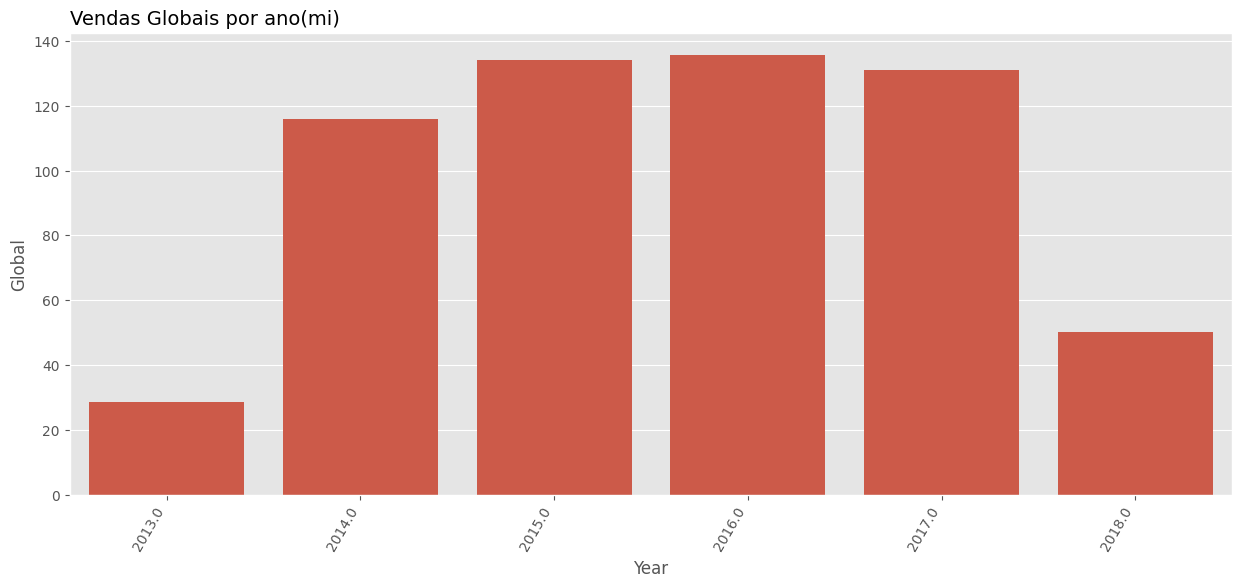

In [40]:
#Grafico de vendas globais por ano
plt.figure(figsize=(15,6))
plt.title('Vendas Globais por ano(mi)', loc='left', fontsize=14)
sns.barplot(data=base_dados, x='Year', y='Global', ci=None, estimator=sum)
plt.xticks(rotation = 60, ha='right');

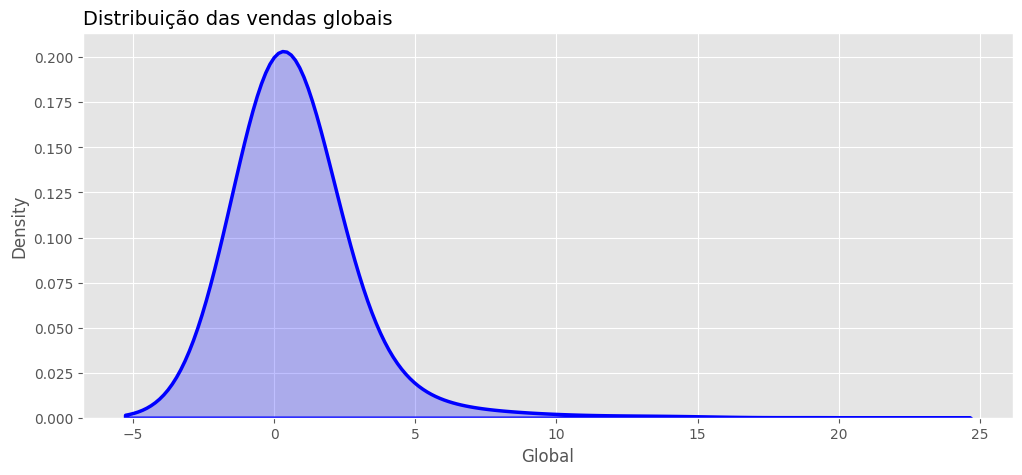

In [41]:
#Grafico mostrando a densidade das vendas globais
plt.figure(figsize=(12,5))
plt.style.use('ggplot')
plt.title('Distribuição das vendas globais', loc='left', fontsize=14)
sns.kdeplot(base_dados['Global'], shade=True, bw=1, color='blue', linewidth=2.5);

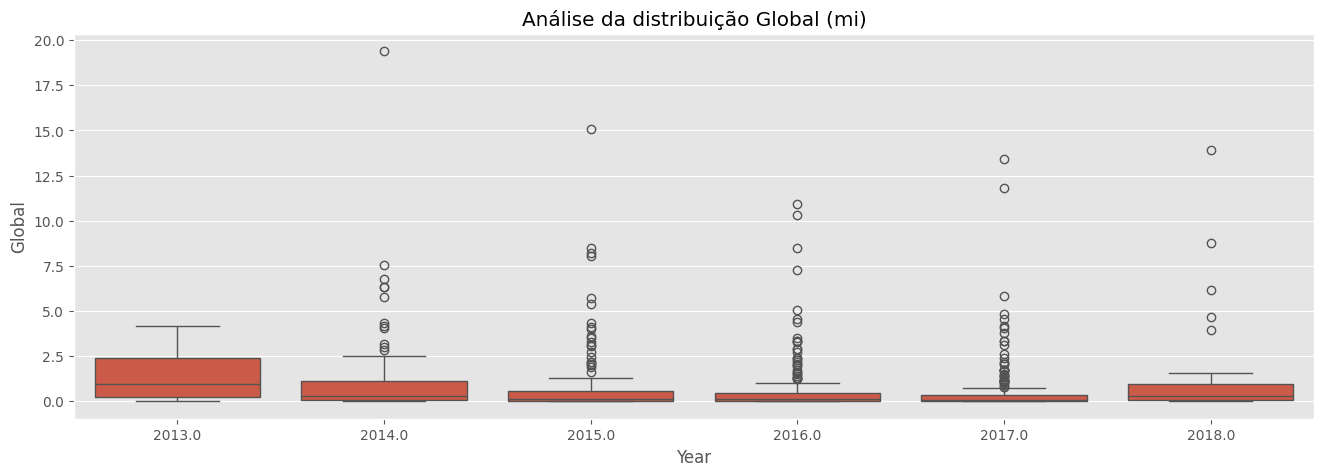

In [42]:
plt.figure(figsize=(16,5))
plt.title('Análise da distribuição Global (mi)')
sns.boxplot(data=base_dados, x='Year', y='Global');

In [43]:
#jogos com vendas globais acima de 10mi de copias vendidas
base_dados.loc[base_dados['Global']>=10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [44]:
Analise = base_dados.groupby( by=['Year'] ).sum().reset_index()

In [45]:
# analisando a proporção dos 100% de cada continente comparado ao Total
America = [ America / Total * 100 for America, Total in zip( Analise['North America'], Analise['Global'] ) ]
Europa = [ Europa / Total * 100 for Europa, Total in zip( Analise['Europe'], Analise['Global'] ) ]
Japao = [ Japao / Total * 100 for Japao, Total in zip( Analise['Japan'], Analise['Global'] ) ]
Mundo = [ Mundo / Total * 100 for Mundo, Total in zip( Analise['Rest of World'], Analise['Global'] ) ]

America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

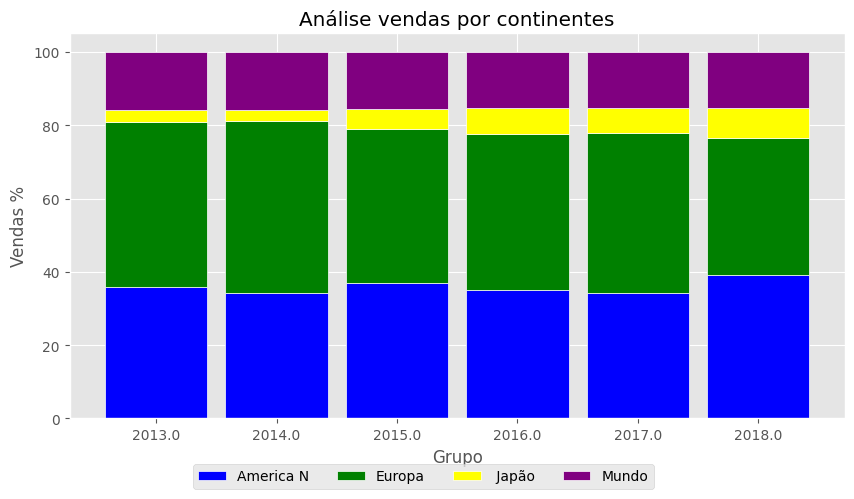

In [46]:
#Grafico de barra empilhada
# Tamanho 
plt.figure( figsize=(10, 5) )

# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]

# titulo
plt.title('Análise vendas por continentes')

# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='blue', edgecolor='white' )

# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='green', edgecolor='white' )

# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='yellow', edgecolor='white' )

# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='purple', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Vendas %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

In [47]:
#Criando ids para as produtoras de jogo em uma nova coluna
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

base_dados['Produtora'] = funcao_label.fit_transform(base_dados['Publisher'])
base_dados['Genero'] = funcao_label.fit_transform(base_dados['Genre'])
base_dados['Jogo'] = funcao_label.fit_transform(base_dados['Game'])

base_dados.head()


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtora,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [48]:
paleta_cores = sns.color_palette('dark6', 8)
paleta_cores

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137),
 (0.0, 0.10980392156862745, 0.4980392156862745),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745)]

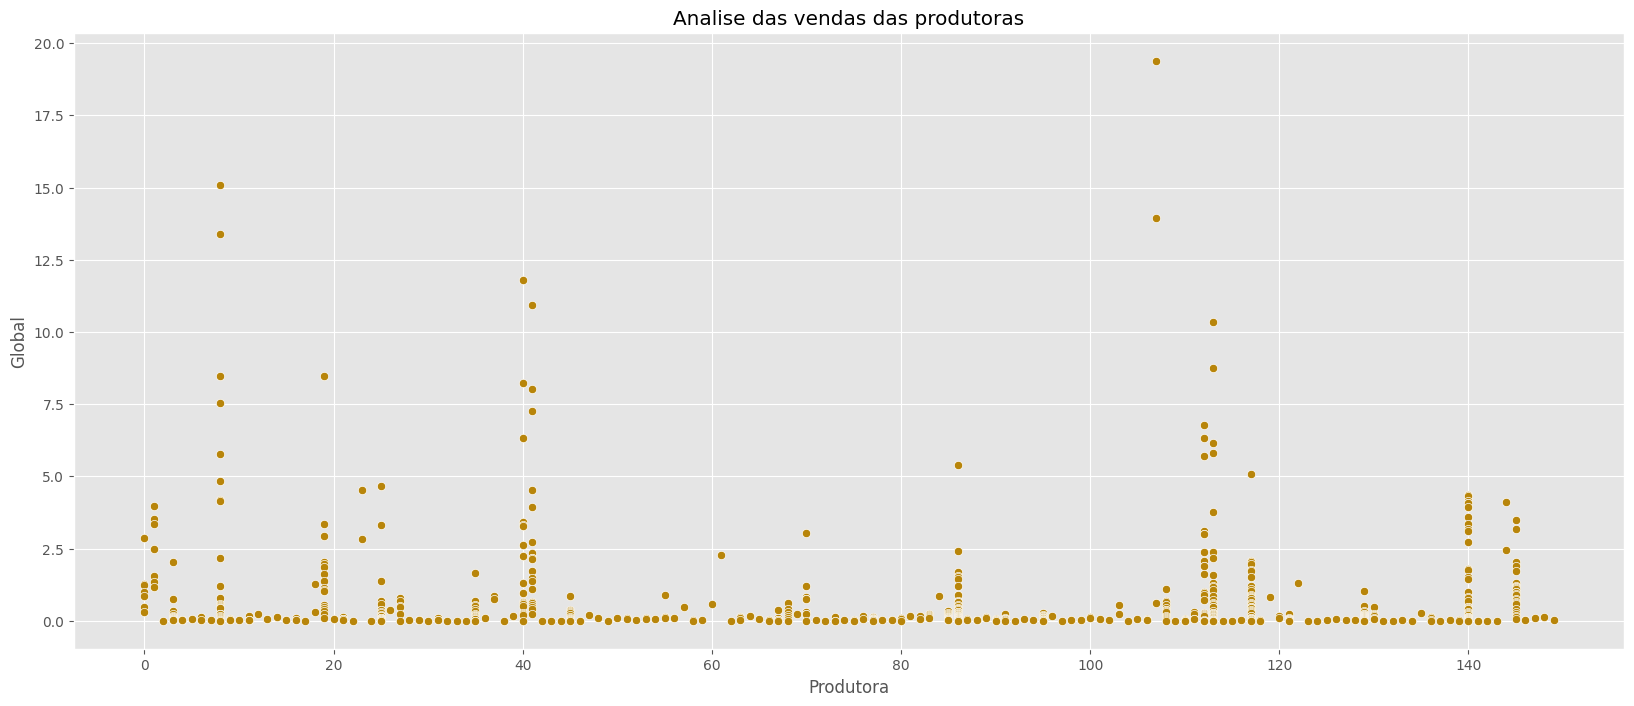

In [49]:
#Analise de plotagem das vendas por produtora
plt.figure(figsize=(20,8))
plt.title('Analise das vendas das produtoras')
sns.scatterplot(data=base_dados, x='Produtora', y='Global', color=paleta_cores[4]);

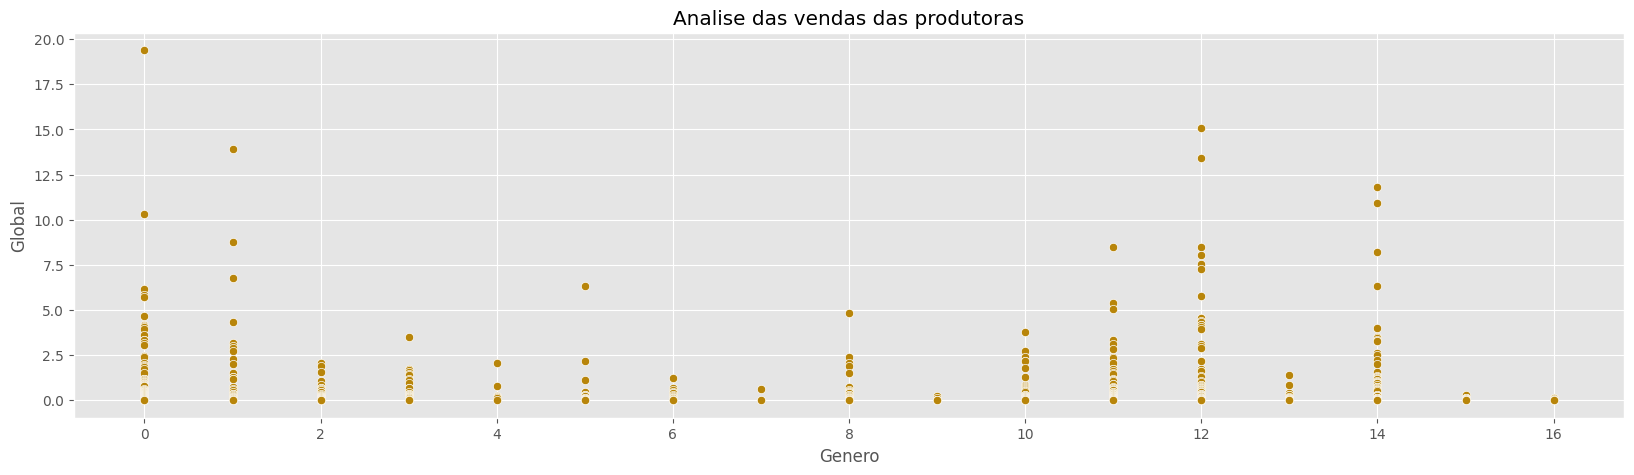

In [50]:
#Analise de plotagem das vendas por genero de jogo
plt.figure(figsize=(20,5))
plt.title('Analise das vendas das produtoras')
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[4]);

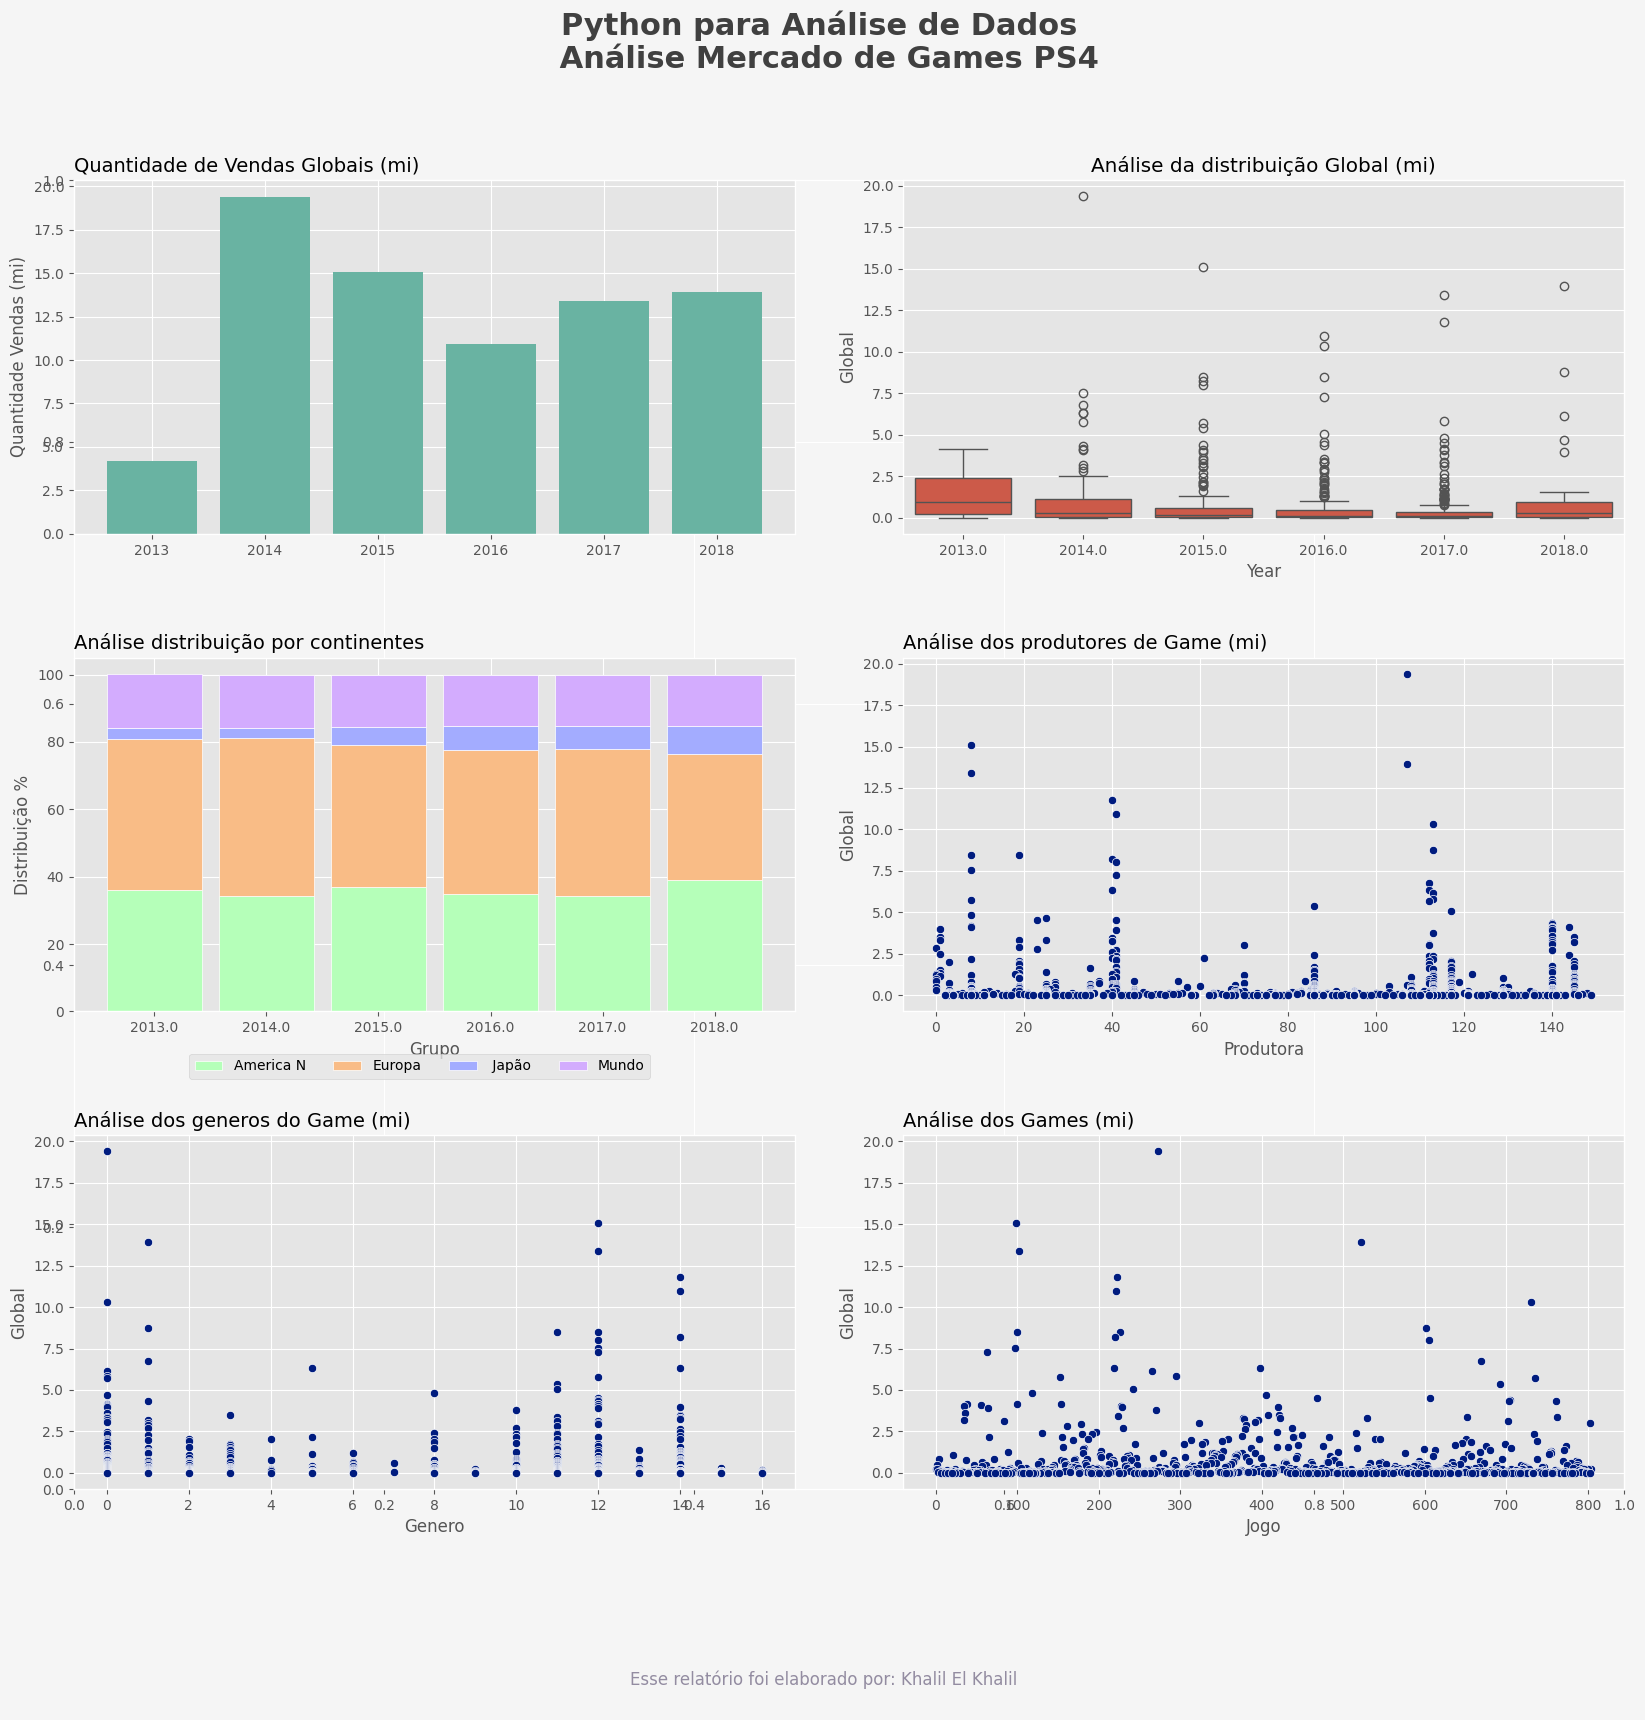

In [51]:
# Relatorio --> Report para o Chefe

# Tamanho da Imagem
fig, ax = plt.subplots( figsize=(20, 17) )

# Cor de fundo
Cor_Fundo = '#f5f5f5'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

# Estilo dos gráficos
sns.axes_style('whitegrid')

# Titulo da figura
plt.suptitle('Python para Análise de Dados \n Análise Mercado de Games PS4', fontsize=22, color='#404040', fontweight=600 )

# Parametros para o grid 
Linhas = 3
Colunas = 2

# Acessando gráfico 1
plt.subplot( Linhas, Colunas, 1)
# Titulo
plt.title('Quantidade de Vendas Globais (mi)', loc='left', fontsize=14 )
# Grafico
plt.bar( base_dados['Year'], base_dados['Global'], color='#69b3a2' )
# Label
plt.ylabel('Quantidade Vendas (mi)')


# Acessando gráfico 2
plt.subplot( Linhas, Colunas, 2)
# titulo
plt.title('Análise da distribuição Global (mi)')
# Plot
sns.boxplot( data=base_dados, x='Year', y='Global')


# Acessando gráfico 3
plt.subplot( Linhas, Colunas, 3)
# LArgura barra no gráfico
Largura_Barra = 0.85
Rotulos = Analise['Year']
Grupos = [0, 1, 2, 3, 4, 5]
# titulo
plt.title('Análise distribuição por continentes', loc='left', fontsize=14)
# Plot da America
plt.bar( Grupos, America, width=Largura_Barra, color='#b5ffb9', edgecolor='white' )
# Plot da Europa
plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#f9bc86', edgecolor='white' )
# Plot do Japao
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#a3acff', edgecolor='white' )
# Plot do Resto do mundo
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=Largura_Barra, color='#d3acfe', edgecolor='white' )
# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')
# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


# Acessando gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', loc='left', fontsize=14 )
sns.scatterplot(data=base_dados, x='Produtora', y='Global', color=paleta_cores[0] );


# Acessando gráfico 5
plt.subplot( Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Genero', y='Global', color=paleta_cores[0] );


# Acessando gráfico 6
plt.subplot( Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', loc='left', fontsize=14)
sns.scatterplot(data=base_dados, x='Jogo', y='Global', color=paleta_cores[0] );


# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

# Rodapé
Rodape = '''
Esse relatório foi elaborado por: Khalil El Khalil
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');